In [28]:
import pickle
import pandas as pd
import glob
import os
import fnmatch
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import numpy as np

In [29]:
mpl.rcParams["text.usetex"] = True
mpl.rcParams["axes.formatter.use_mathtext"] = True

### Optimality Gap vs. Time

In [30]:
path_stem = "demonstrate_results"

# Find the CSV files with names containing "pc=NoPreconditioner"
no_preconditioner_files = glob.glob(os.path.join(path_stem, '*pc=NoPreconditioner*history.csv'))
no_preconditioner_dfs = [pd.read_csv(file) for file in no_preconditioner_files]

# Find the CSV files with names containing "pc=PartialCholesky"
pc_files = glob.glob(os.path.join(path_stem, '*pc=PartialCholesky*history.csv'))
pc_dfs = [pd.read_csv(file) for file in pc_files]

# Find the CSV files with names containing "pc=Nystrom"
nystrom_files = glob.glob(os.path.join(path_stem, '*pc=Nystrom*history.csv'))
nystrom_dfs = [pd.read_csv(file) for file in nystrom_files]

In [31]:
latest_no_preconditioner_file = max(no_preconditioner_files, key=os.path.getmtime)
latest_pc_file = max(pc_files, key=os.path.getmtime)
latest_nystrom_file = max(nystrom_files, key=os.path.getmtime)

print("Latest No Preconditioner File:\n", os.path.basename(latest_no_preconditioner_file))
print("Latest PC File:\n", os.path.basename(latest_pc_file))
print("Latest Nystrom File:\n", os.path.basename(latest_nystrom_file))

Latest No Preconditioner File:
 ts=2024-04-15--22:00:24_prob=risk_model_m=30000_n=80000_k=400_pc=NoPreconditioner_rank=0_tol=1e-08_history.csv
Latest PC File:
 ts=2024-03-22--22:51:03_prob=risk_model_m=10000_n=50000_k=400_pc=PartialCholesky_rank=20_tol=1e-08_history.csv
Latest Nystrom File:
 ts=2024-04-15--18:30:20_prob=risk_model_m=30000_n=80000_k=400_pc=Nystrom_rank=20_tol=1e-08_history.csv


In [32]:
filename = os.path.basename(latest_nystrom_file)

# Extract the values of m and n from the filename
m = int(filename.split('_m=')[1].split('_n=')[0])
n = int(filename.split('_n=')[1].split('_k=')[0])

print("Value of m:", m)
print("Value of n:", n)

Value of m: 30000
Value of n: 80000


In [33]:
nys_df = pd.read_csv(latest_nystrom_file)
nys_df.head()

,iter,primal_feasibility,dual_feasibility,optimality_gap,inner_iter_predictor,inner_iter_corrector,krylov_tol,rank,construct_precond_elapsed,CG_solving_elapsed,cumulative_time
0,1,0.384990,0.394951,0.006545,7,7,0.000001,20,13.532453,10.570133,25.528200
1,2,0.176680,0.351288,0.020137,33,32,0.000001,20,7.523986,43.975819,78.344772
2,3,0.004315,0.086005,0.005402,49,53,0.000001,20,7.287341,67.301659,153.608429
3,4,0.000811,0.001162,0.000155,136,155,0.000001,20,7.404605,192.010718,353.762802
4,5,0.000003,0.000458,0.000078,203,199,0.000001,20,7.529329,263.014299,624.973104


In [34]:
noP_df = pd.read_csv(latest_no_preconditioner_file)
noP_df.head()

,iter,primal_feasibility,dual_feasibility,optimality_gap,inner_iter_predictor,inner_iter_corrector,krylov_tol,rank,construct_precond_elapsed,CG_solving_elapsed,cumulative_time
0,1,0.384986,0.394948,0.006545,59,63,0.000001,0,0.012411,131.774649,134.009493
1,2,0.176688,0.351285,0.020137,157,167,0.000001,0,0.011838,346.313577,482.593416
2,3,0.004314,0.086014,0.005403,156,150,0.000001,0,0.012056,316.346484,800.045980
3,4,0.000818,0.001164,0.000156,215,196,0.000001,0,0.012917,425.845653,1226.946201
4,5,0.000004,0.000461,0.000079,187,184,0.000001,0,0.009241,388.220323,1616.272639


In [35]:
port_fig_path = f"../../plots/fig_portfolio_m={m}_n={n}.pdf"

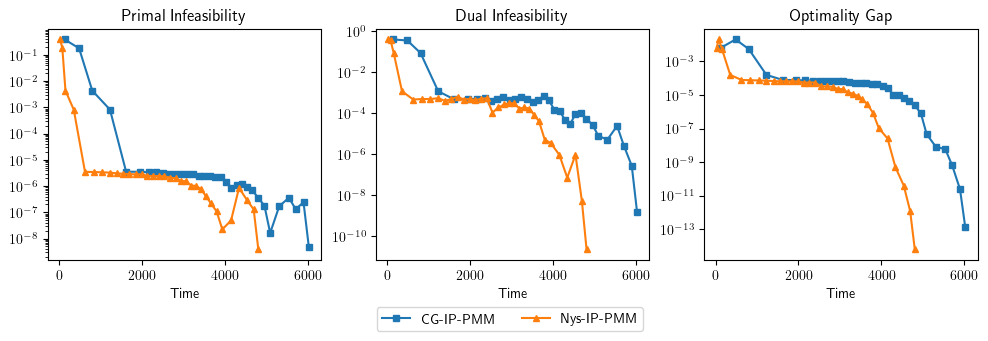

In [36]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(12, 3))

# Primal infeasibility
axes[0].plot(noP_df['cumulative_time'], noP_df['primal_feasibility'], marker='s', markersize=4, linestyle='-', label='CG-IP-PMM')
axes[0].plot(nys_df['cumulative_time'], nys_df['primal_feasibility'], marker='^', markersize=4, linestyle='-', label='Nys-IP-PMM')
axes[0].set_title('Primal Infeasibility')
axes[0].set_xlabel('Time')
axes[0].set_yscale('log')

# Dual infeasibility
axes[1].plot(noP_df['cumulative_time'], noP_df['dual_feasibility'], marker='s', markersize=4, linestyle='-', label='CG-IP-PMM')
axes[1].plot(nys_df['cumulative_time'], nys_df['dual_feasibility'], marker='^', markersize=4, linestyle='-', label='Nys-IP-PMM')
axes[1].set_title('Dual Infeasibility')
axes[1].set_xlabel('Time')
axes[1].set_yscale('log')

# Optimality gap
axes[2].plot(noP_df['cumulative_time'], noP_df['optimality_gap'], marker='s', markersize=4, linestyle='-', label='CG-IP-PMM')
axes[2].plot(nys_df['cumulative_time'], nys_df['optimality_gap'], marker='^', markersize=4, linestyle='-', label='Nys-IP-PMM')
axes[2].set_title('Optimality Gap')
axes[2].set_xlabel('Time')
axes[2].set_yscale('log')

# Create a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.51, -0.15))

plt.savefig(port_fig_path, format='pdf', bbox_inches = 'tight')

plt.show()